### Projeto de Minimos Quadrados 

O projeto consiste em utilizar o metodo de minimos quadrados para regressão com objetivo de observar o desempenho do metodo para a aplicacao. Para fazer esta analise, o MMQ sera comparado com o algoritmo KNN de regressao. 

Neste Projeto, sera utilziado o dataset Iris e para a avaliacao de ambos os metodos o erro medio quadrado e o r2score. 

### Imports

In [8]:
import numpy as np
import pandas as pd
import math

# ML imports
import sklearn 
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn import metrics
from sklearn import linear_model
from sklearn.datasets import load_iris

# plot imports
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

### Processamento da base de dados 

In [2]:
iris = load_iris()

X = iris.data
Y = iris.target

iris.DESCR

'Iris Plants Database\n====================\n\nNotes\n-----\nData Set Characteristics:\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)\n    ============== ==== ==== ======= ===== ============

In [3]:
data = pd.DataFrame(X, columns=['sepal_length', 'sepal_width', 'petal_length', 'petal_width'])
target = pd.DataFrame(Y, columns=['Species'])

In [4]:
iris = pd.concat([data, target], axis=1)

#### Visualizacao da distribuicao dos dados 

/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kde.py:488: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:83: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


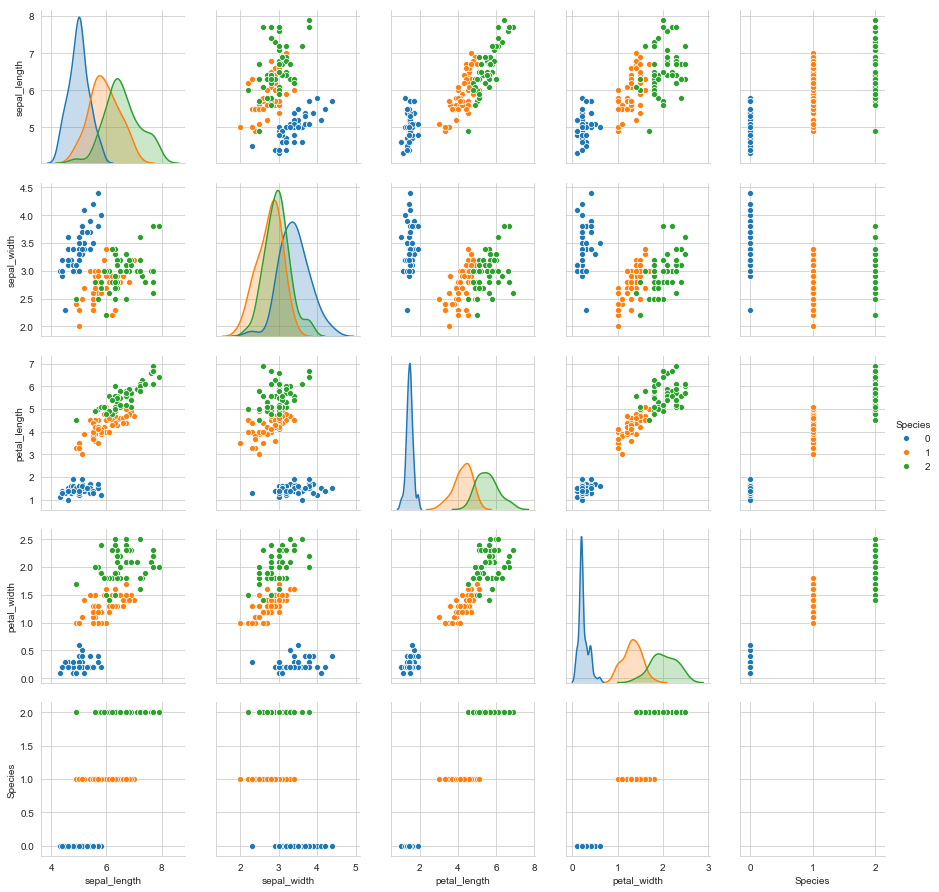

In [5]:
sns.pairplot(iris, hue='Species')

### Modelos de Predição 

A seguir sera realizado as comparações dos algorimos KNN e MMQ

#### Metodo de Minimos Quadrados 

In [6]:
reg = linear_model.LinearRegression()
X_train, X_test, Y_train, Y_test = train_test_split(data,target, test_size=0.4, random_state=3)
reg.fit (X_train, Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [7]:
iris_y_pred = reg.predict(X_test)

In [9]:
math.sqrt(mean_squared_error(iris_y_pred, Y_test))

0.2309250199539851

In [10]:
r2_score(Y_test, iris_y_pred)

0.9194736101398094

#### KNN  

In [11]:
# variar o numero de k/ no momento k = 10
neigh = KNeighborsRegressor(n_neighbors=15)
neigh.fit(X_train, Y_train)

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=15, p=2,
          weights='uniform')

In [12]:
iris_pred_knn = neigh.predict(X_test)

In [13]:
math.sqrt(mean_squared_error(iris_pred_knn, Y_test))

0.19776529298921763

In [14]:
r2_score(Y_test, iris_pred_knn)

0.9409395973154363

#### Metodo alternativo do minimos quadrados 

In [15]:
reg_2 = linear_model.RidgeCV(alphas=[0.05, 0.025,0.075 ,0.1, 0.5 ,1.0, 1.5, 2.0, 5.0, 7.0 ,10.0], cv=11)
reg_2.fit (X_train, Y_train) 

RidgeCV(alphas=[0.05, 0.025, 0.075, 0.1, 0.5, 1.0, 1.5, 2.0, 5.0, 7.0, 10.0],
    cv=11, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [16]:
pred = reg_2.predict(X_test)
reg_2.alpha_

0.5

In [17]:
math.sqrt(mean_squared_error(pred, Y_test))

0.2313249766729614

In [18]:
r2_score(Y_test, pred)

0.9191944289438397